In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import cv2

import math

In [2]:
!wget http://www.petsworld.in/blog/wp-content/uploads/2014/09/cat.jpg

--2021-12-19 04:43:42--  http://www.petsworld.in/blog/wp-content/uploads/2014/09/cat.jpg
Resolving www.petsworld.in (www.petsworld.in)... 139.99.130.164
Connecting to www.petsworld.in (www.petsworld.in)|139.99.130.164|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47687 (47K) [image/jpeg]
Saving to: ‘cat.jpg.1’

cat.jpg.1           100%[===================>]  46.57K   134KB/s    in 0.3s    

2021-12-19 04:43:43 (134 KB/s) - ‘cat.jpg.1’ saved [47687/47687]



shape of Image  (600, 400, 3)


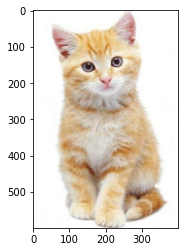

In [3]:
## read and show that image using matplotlib
cat = plt.imread('cat.jpg')

## shape
print('shape of Image ', cat.shape)

plt.imshow(cat);  

shape of Image  (600, 400, 3)


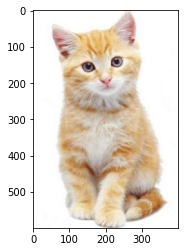

In [4]:
## read and show that image using cv2-opencv
cat = cv2.imread('cat.jpg')

print('shape of Image ', cat.shape)

## cv2 read images BGR --> convert it to RGB
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

## show
plt.imshow(cat);   

Shape before resizing  (400, 600)
Shape after resizing  (134, 200)


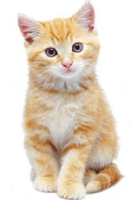

In [5]:
## read and show image using pillow
from PIL import Image


cat = Image.open('cat.jpg')
print('Shape before resizing ', cat.size)

h_cat, w_cat = math.ceil(cat.size[0]/3), math.ceil(cat.size[1]/3)  
cat = cat.resize((h_cat, w_cat))  ## resize the image to half
print('Shape after resizing ', cat.size)

cat

Shape before resizing  (400, 600)
Shape after resizing  (134, 200)


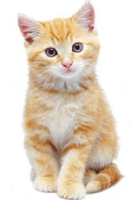

In [6]:
## using keras
from tensorflow.keras.preprocessing import image
cat = image.load_img('cat.jpg')
print('Shape before resizing ', cat.size)

h_cat, w_cat = math.ceil(cat.size[0]/3), math.ceil(cat.size[1]/3)
cat = cat.resize((h_cat, w_cat))  ## resize the image to half
print('Shape after resizing ', cat.size)

cat

In [7]:
## read and show that image using matplotlib
ref_cat = plt.imread('cat.jpg')

## shape
print('shape of Image ', ref_cat.shape)

shape of Image  (600, 400, 3)


In [8]:
## create a function to check that image is cat or not
def is_cat(req_image):
  return np.all(ref_cat==req_image)

In [9]:
## get another Image
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw&s

/bin/bash: s: command not found
--2021-12-19 04:43:50--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.132.102, 74.125.132.138, 74.125.132.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6844 (6.7K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw.1’

images?q=tbn:ANd9Gc 100%[===================>]   6.68K  --.-KB/s    in 0s      

2021-12-19 04:43:50 (48.2 MB/s) - ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw.1’ saved [6844/6844]



Image size  (168, 300, 3)


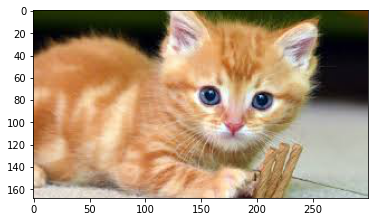

In [10]:
## open that Image
img = plt.imread('images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw')
print('Image size ', img.shape)

plt.imshow(img);

In [11]:
## we must reshape(resize) the second image to be the same size of the first source image
img = cv2.resize(img, (400, 600))  ## note that using cv2 ---> width then height

print('shape of second image after resizing', img.shape)

shape of second image after resizing (600, 400, 3)


In [12]:
## call the function and compare the second image with our source(refrence) image
is_cat(img)   ## --> as we expect becaues we use all pixels as features

False


## Can we use better features?

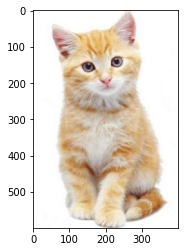

In [13]:
## load the image using cv2 and convert it to rgb

img_bgr = cv2.imread('cat.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb);

RGB image size (600, 400, 3)
gray image size (600, 400)


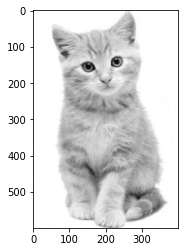

In [14]:
## convert it to gray  --> Edges are clear in gray images
gray_cat = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

print('RGB image size', img_rgb.shape)
print('gray image size', gray_cat.shape)

plt.imshow(gray_cat, cmap='gray');

B&W Image shape  (600, 400)


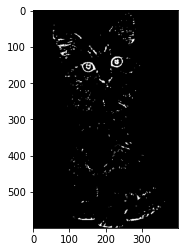

In [15]:
## How to convert to black and white image
thresh_cat = cv2.adaptiveThreshold(src=gray_cat, maxValue=255.0, 
                                adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                thresholdType=cv2.THRESH_BINARY_INV, 
                                blockSize=21, C=20)


print('B&W Image shape ', thresh_cat.shape)

plt.imshow(thresh_cat, cmap='gray');

### Using Filter

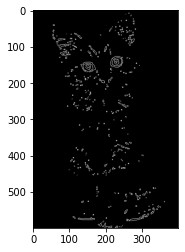

In [16]:
## Let's make a filter --> the best one in Canny
filter_cat = cv2.Canny(thresh_cat, 100, 200)   ## filter the edges of the Image

plt.imshow(filter_cat, cmap='gray');

### Using dilation

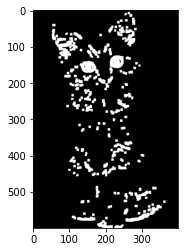

In [17]:
## Let's make a dilation
kernel_sz = 3
iterations = 2
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_sz, kernel_sz))
dilated_cat = cv2.dilate(filter_cat, structuringElement, iterations=iterations)

plt.imshow(dilated_cat, cmap='gray');

In [18]:
## We can find structures or around groups of pixels or clusters. These are called 
contours, hierarchy = cv2.findContours(filter_cat, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [19]:
len(contours), len(hierarchy)

(482, 1)

In [20]:
cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)   ## draw contoures on the cat image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

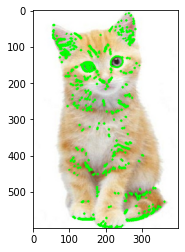

In [21]:
plt.imshow(img_rgb);

### Done!